In [ ]:
Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

In [ ]:
A1. Batch Normalization is a technique used in training artificial neural networks to improve the 
stability and performance of the network. It is particularly useful when dealing with deep neural 
networks, where the internal covariate shift problem can arise.

The internal covariate shift problem refers to the changes in the distribution of the inputs to each 
layer of the neural network as the parameters of the previous layers change during training. This can 
lead to slower convergence and the need for careful initialization and lower learning rates.

Batch Normalization addresses this issue by normalizing the inputs to each layer, using the statistics 
(mean and variance) of the current mini-batch of data. The process of batch normalization is as follows:

For each training mini-batch:
Calculate the mean (μ) and variance (σ^2) of the activations in the current mini-batch for each feature 
(or channel, in the case of convolutional layers).
Normalize the activations by subtracting the mean and dividing by the standard deviation (√σ^2 + ε), 
where ε is a small constant to avoid division by zero.
Scale and shift the normalized activations using learned parameters γ and β, respectively.

Mathematically, the batch normalization transformation is defined as:

z = (x - μ) / √(σ^2 + ε)
y = γ * z + β

The parameters γ and β are learned during the training process, allowing the network to undo the 
normalization if necessary.

The key benefits of using batch normalization in neural networks include:

Faster convergence: By reducing the internal covariate shift, batch normalization allows for the use of 
higher learning rates, leading to faster convergence during training.

Improved generalization: Batch normalization can act as a regularizer, reducing the sensitivity of the 
network to the scale of the inputs, and leading to better generalization performance.
    
Stability and robustness: Batch normalization can make the network more robust to the initial values of 
the parameters and the scale of the inputs, improving the overall stability of the training process.
    
Reduced overfitting: By introducing some noise into the activations through the normalization process, 
batch normalization can help reduce overfitting.

In [ ]:
Q2. Describe the benefits of using batch normalization during training.

In [ ]:
A2. Faster Convergence:
Batch normalization helps reduce the internal covariate shift problem, where the distribution of inputs 
to each layer changes during training as the parameters of the previous layers are updated.
By normalizing the inputs to each layer, batch normalization allows the use of higher learning rates, 
leading to faster convergence of the training process.
    
Improved Generalization:
The normalization and regularization effects of batch normalization can help improve the generalization 
performance of the trained model.
Batch normalization acts as a form of regularization, making the network less sensitive to the scale of 
the inputs and the initial values of the parameters.
    
Enhanced Stability:
Batch normalization can improve the stability of the training process, making it more robust to the 
choice of initialization and the scale of the inputs.
This stability can be particularly beneficial when training very deep neural network architectures, 
where the internal covariate shift problem is more pronounced.
    
Reduced Overfitting:
The normalization and regularization effects of batch normalization can help reduce overfitting, as the 
introduced noise in the activations can prevent the network from memorizing the training data.

In [ ]:
Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

In [ ]:
A3. Normalization: The normalization step helps to reduce the internal covariate shift problem by 
ensuring that the inputs to each layer have a consistent distribution, regardless of the changes in the 
parameters of the previous layers.

Learnable Parameters: The learnable parameters γ and β allow the network to adaptively scale and shift 
the normalized activations, which gives the network the flexibility to undo the normalization if needed, 
based on the specific requirements of the task and the network architecture.
    
Improved Stability and Convergence: By stabilizing the distribution of the inputs to each layer, batch 
normalization enables the use of higher learning rates, leading to faster convergence and improved 
training stability, especially in deep neural networks.
    
Regularization: The normalization and the introduction of noise (through the mini-batch statistics) can 
also act as a form of regularization, helping to improve the generalization performance of the trained 
model.

In [2]:
#Importing the required packages

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Flatten as flat,Dense as dense
from tensorflow.keras.layers import BatchNormalization as bn

In [19]:
#Loading the train and test data
(Xtr,ytr),(Xte,yte)=mnist.load_data()

In [22]:
#Checking the shape of the train and test datasets
Xtr.shape,ytr.shape,Xte.shape,yte.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

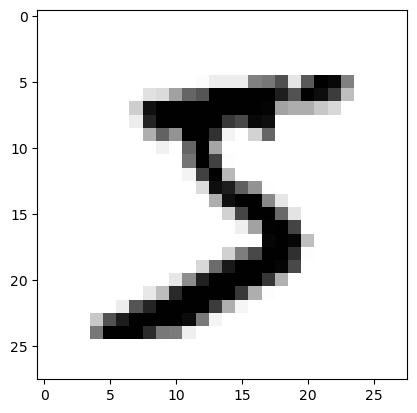

In [21]:
#Checking the image
plt.imshow(Xtr[0],cmap='binary')
plt.show()

<Axes: >

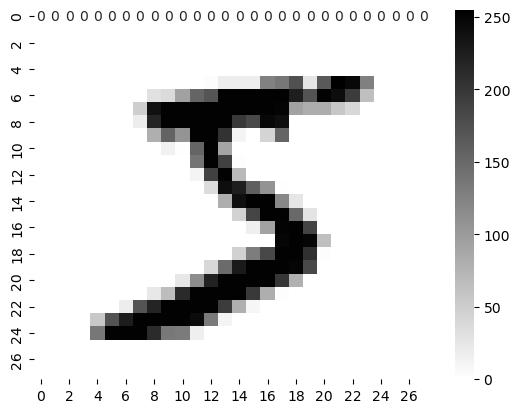

In [13]:
#plotting a heatmap
sns.heatmap(Xtr[0],annot=True,cmap='binary')

In [23]:
#Scaling the train and test data
#Splitting into validation data
Xtr=Xtr/255
Xte=Xte/255
Xtr,Xval=Xtr[5000:],Xtr[:5000]
ytr,yval=ytr[5000:],ytr[:5000]

In [16]:
#Checking the input shape of ia+mage
Xtr[0].shape

(28, 28)

In [25]:
#Creating the first model without batch normalisation
model1=seq()
model1.add(flat(input_shape=[28,28]))
model1.add(dense(300,activation='relu'))
model1.add(dense(100,activation='relu'))
model1.add(dense(10,activation='softmax'))

In [26]:
#checking the model summary
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 300)               235500    
                                                                 
 dense_31 (Dense)            (None, 100)               30100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
#compiling the model
model1.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [28]:
#Training the model
model1.fit(Xtr,ytr,epochs=25,validation_data=(Xval,yval),batch_size=32)

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6084 - accuracy: 0.8418 - val_loss: 0.3114 - val_accuracy: 0.9148
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2894 - accuracy: 0.9185 - val_loss: 0.2452 - val_accuracy: 0.9324
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2369 - accuracy: 0.9319 - val_loss: 0.2049 - val_accuracy: 0.9436
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2018 - accuracy: 0.9430 - val_loss: 0.1821 - val_accuracy: 0.9496
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1754 - accuracy: 0.9498 - val_loss: 0.1593 - val_accuracy: 0.9552
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1549 - accuracy: 0.9552 - val_loss: 0.1456 - val_accuracy: 0.9586
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1383 - accuracy: 0.9607 - val_loss: 0.1339 - val_accuracy:

# Max accuracy without batch noramlisation is 99.02%

In [29]:
#Creating the second model with batch normalisation
model2=seq()

In [30]:
model2.add(flat(input_shape=[28,28]))
model2.add(bn())
model2.add(dense(300,activation='relu'))
model2.add(bn())
model2.add(dense(100,activation='relu'))
model2.add(bn())
model2.add(dense(10,activation='softmax'))

In [31]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_15 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_16 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_17 (Bat  (None, 100)            

In [32]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [33]:
#Training the second model with batch normalisation
model2.fit(Xtr,ytr,validation_data=(Xval,yval),batch_size=32,epochs=25)

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3551 - accuracy: 0.8930 - val_loss: 0.1890 - val_accuracy: 0.9448
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1813 - accuracy: 0.9457 - val_loss: 0.1425 - val_accuracy: 0.9576
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1379 - accuracy: 0.9598 - val_loss: 0.1265 - val_accuracy: 0.9620
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1111 - accuracy: 0.9671 - val_loss: 0.1205 - val_accuracy: 0.9626
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0939 - accuracy: 0.9721 - val_loss: 0.1119 - val_accuracy: 0.9660
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0803 - accuracy: 0.9758 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0708 - accuracy: 0.9790 - val_loss: 0.1093 - val_accuracy:

# Max accuracy with batch normalisation is 99.52

## Batch normalisation increases the accuracy by 0.5

## Defining the functions to create models 

In [13]:

def make_m1():    
    m1=seq()
    m1.add(flat(input_shape=[28,28]))
    m1.add(dense(300,activation='relu'))
    m1.add(dense(100,activation='relu'))
    m1.add(dense(10,activation='softmax'))
    return m1

In [14]:
def make_m2():    
    m2=seq()
    m2.add(flat(input_shape=[28,28]))
    m2.add(bn())
    m2.add(dense(300,activation='relu'))
    m2.add(bn())
    m2.add(dense(100,activation='relu'))
    m2.add(bn())
    m2.add(dense(10,activation='softmax'))
    return m2

In [15]:
for i in [16,32,64]:
    m1=make_m1()
    m2=make_m2()
    print(f'Batch size: {i}\n')
    for model in [m1,m2]:
        model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
        model.fit(Xtr,ytr,validation_data=(Xval,yval),epochs=5,batch_size=i)
        print('='*30)

Batch size: 16

Epoch 1/5
3438/3438 [==============================] - 5s 1ms/step - loss: 0.4699 - accuracy: 0.8724 - val_loss: 0.2523 - val_accuracy: 0.9314
Epoch 2/5
3438/3438 [==============================] - 5s 1ms/step - loss: 0.2271 - accuracy: 0.9350 - val_loss: 0.1838 - val_accuracy: 0.9508
Epoch 3/5
3438/3438 [==============================] - 5s 1ms/step - loss: 0.1720 - accuracy: 0.9501 - val_loss: 0.1482 - val_accuracy: 0.9592
Epoch 4/5
3438/3438 [==============================] - 5s 1ms/step - loss: 0.1378 - accuracy: 0.9608 - val_loss: 0.1245 - val_accuracy: 0.9668
Epoch 5/5
3438/3438 [==============================] - 5s 1ms/step - loss: 0.1147 - accuracy: 0.9665 - val_loss: 0.1078 - val_accuracy: 0.9690
Epoch 1/5
3438/3438 [==============================] - 8s 2ms/step - loss: 0.3475 - accuracy: 0.8945 - val_loss: 0.1721 - val_accuracy: 0.9476
Epoch 2/5
3438/3438 [==============================] - 7s 2ms/step - loss: 0.1881 - accuracy: 0.9427 - val_loss: 0.1333 - val_

## The results are:
    Batch 16: without BN - 96.65, with BN - 96.8 
    Batch 32: without BN - 95.10, with BN - 97.1
    Batch 64: without BN - 93.27, with BN - 96.5

### Clearly as the batch size increases the accuracy decreases if we dont use batch normalisation

In [ ]:
Q3. Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

In [ ]:
A3. Advantages:

Faster Convergence:
Batch normalization helps reduce the internal covariate shift, allowing the use of higher learning rates 
and leading to faster convergence during training.

Improved Generalization:
The normalization and regularization effects of batch normalization can improve the model's 
    generalization performance, reducing overfitting.

Enhanced Stability:
Batch normalization makes the training process more robust to the choice of initialization and the scale 
of the inputs, improving the overall stability.

Reduced Sensitivity to Hyperparameters:
Batch normalization can make the training less sensitive to certain hyperparameters, such as the learning 
rate, simplifying the tuning process.

Improved Numerical Stability:
Batch normalization helps maintain the activations within a more stable range, preventing issues like 
vanishing or exploding gradients.

Facilitates the Use of Higher Learning Rates:
By reducing the internal covariate shift, batch normalization allows for the use of higher learning 
rates, further accelerating convergence.

Potential Limitations:

Dependency on Batch Size:
The normalization in batch normalization is performed based on the statistics of the current mini-batch. 
This can introduce some instability if the batch size is too small.

Sensitivity to Dataset Shift:
If the distribution of the training data changes significantly during the training process (e.g., due to 
data augmentation), the batch normalization statistics may not accurately reflect the true data 
distribution.

Increased Memory Consumption:
Batch normalization requires storing and computing the mean and variance for each mini-batch, which can 
increase the memory consumption of the model, especially for large batches.

Challenges in Recurrent Neural Networks:
Applying batch normalization in recurrent neural networks (RNNs) can be more challenging, as the 
normalization needs to be done carefully to avoid introducing instabilities in the recurrent connections.

Potential for Covariate Shift in Inference:
During inference (deployment), the normalization is performed using the entire training dataset 
statistics, which can lead to a covariate shift compared to the training distribution, impacting the 
model's performance.